# Dog Breed Classification Model 🐶

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data is from Kaggle's dog breed identification competition.

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

A file with prediction probabilities of each dog breed for each test image.

## 4. Features

Info about the data:
* Using unstructured data (images) so will be best to use deep learning/transfer learning.
* There are 120 breeds meaning, 120 different classes.
* There are 10,000+ images in the training set (with labels)
* There are 10,000+ images in the test set (no labels) 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import tensorflow_hub as hub


In [21]:
# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")


GPU available


## Getting our data ready (turning it into Tensors)

In [22]:
# Checkout the labels of our data
labels_csv = pd.read_csv("data/labels.csv")
labels_csv.describe()


,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [23]:
labels_csv.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

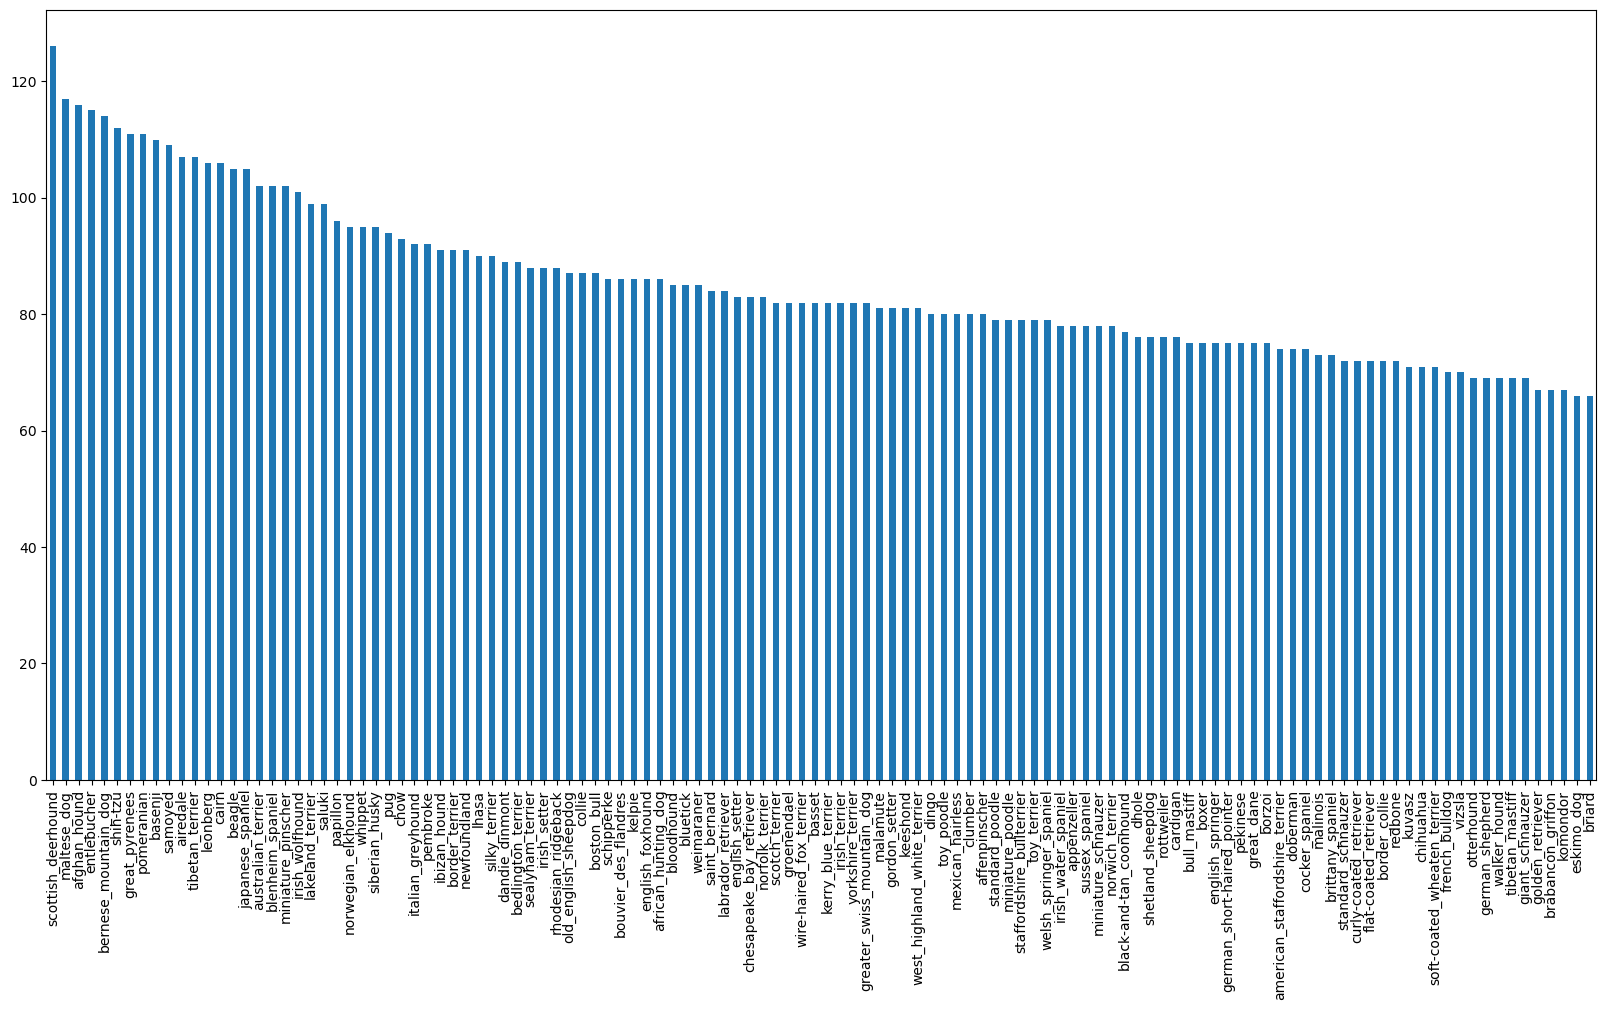

In [24]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))


In [25]:
labels_csv["breed"].value_counts().median()


82.0

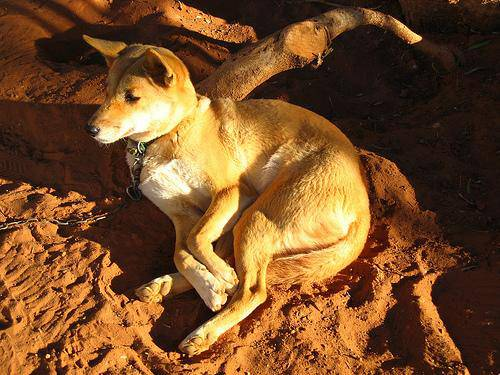

In [26]:
# View an image
from IPython.display import Image

Image("data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")


### Getting images and their labels

In [27]:
# Create a list of all image ID's
filenames = []
for fname in labels_csv["id"]:
    filenames.append(f"data/train/{fname}.jpg")

filenames[:10]


['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [28]:
# Check if number of filenames matches number of actual train images files
import os

if len(os.listdir("data/train/")) == len(filenames):
    print("Yes")
else:
    print("No")


Yes


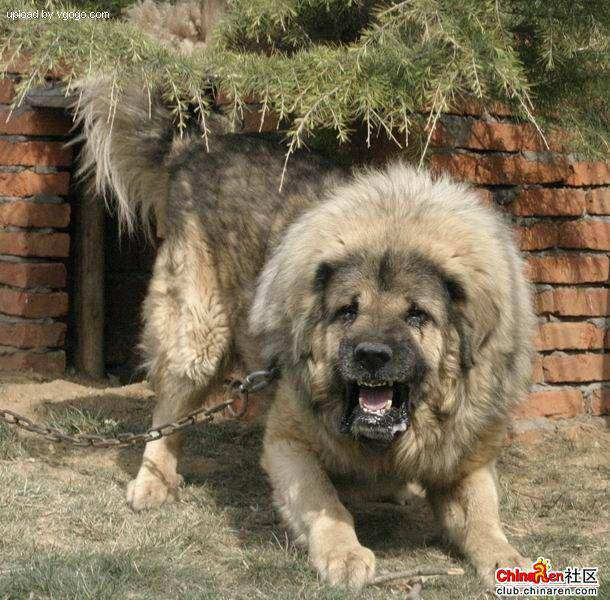

In [29]:
Image(filenames[9000])

In [30]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [35]:
# Create labels
labels = np.array(labels_csv["breed"])
labels[:10], len(labels)


(array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
        'scottish_deerhound'], dtype=object),
 10222)